In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
# Coming from ToC guidelines of JCIM
FIGSIZE = (3.25, 1.75) # inches
FONT_KWARGS = dict(fontname="Helvetica", fontsize=8)
SMALL_FONT_KWARGS = dict(fontname="Helvetica", fontsize=6)
DPI = 300

In [4]:
mpl.rcParams['figure.dpi'] = DPI

In [5]:
def sigmoid(x): 
    return 1 / (1 + np.e ** x)

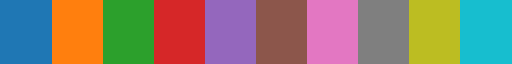

In [6]:
cmap = plt.get_cmap("tab10")
cmap

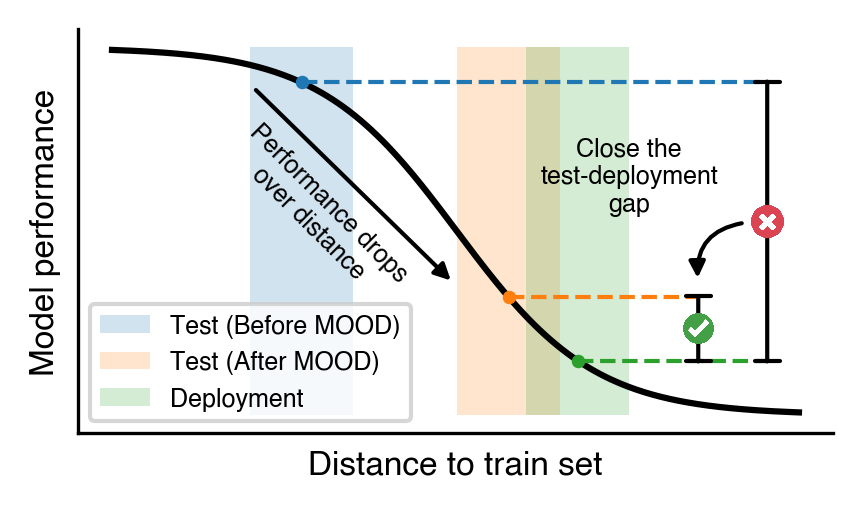

In [7]:
distances = np.arange(0, 1, 1 / 250)
performances = sigmoid((distances - 0.5) * 10)

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(distances, performances, "k")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Distance to train set", **FONT_KWARGS)
ax.set_ylabel("Model performance", **FONT_KWARGS)

ax.fill_betweenx([0, 1], [0.2], [0.35], alpha=0.2, label="Test (Before MOOD)")
ax.fill_betweenx([0, 1], [0.5], [0.65], alpha=0.2, label="Test (After MOOD)")
ax.fill_betweenx([0, 1], [0.6], [0.75], alpha=0.2, label="Deployment")

y_before = sigmoid((0.275 - 0.5) * 10)
y_after = sigmoid((0.575 - 0.5) * 10)
y_deploy = sigmoid((0.675 - 0.5) * 10)

font = fm.FontProperties(family=SMALL_FONT_KWARGS["fontname"], size=SMALL_FONT_KWARGS["fontsize"])
ax.legend(prop=font, loc="lower left")

ax.scatter([0.275], y_before, color=cmap(0), s=5, zorder=3)
ax.scatter([0.575], y_after, color=cmap(1), s=5, zorder=3)
ax.scatter([0.675], y_deploy, color=cmap(2), s=5, zorder=3)

ax.plot([0.275, 0.95], [y_before, y_before], "--", color=cmap(0), linewidth=1) 
ax.plot([0.575, 0.85], [y_after, y_after], "--", color=cmap(1), linewidth=1) 
ax.plot([0.675, 0.95], [y_deploy, y_deploy], "--", color=cmap(2), linewidth=1) 

ax.annotate("", xy=(0.95, y_before + 0.025), xytext=(0.95, y_deploy - 0.025) , arrowprops=dict(arrowstyle="|-|", mutation_scale=3))
ax.annotate("", xy=(0.85, y_after + 0.025), xytext=(0.85, y_deploy - 0.025) , arrowprops=dict(arrowstyle="|-|", mutation_scale=3))

ax.annotate("", xy=(0.2, 0.9), xytext=(0.5, 0.35) , arrowprops=dict(arrowstyle="<|-", mutation_scale=8, color="black"))
ax.text(0.3, 0.55, "Performance drops\nover distance", **SMALL_FONT_KWARGS, ha='center', va="center", rotation=-45)

ax.spines[['right', 'top']].set_visible(False)

cross_emoji = plt.imread('assets/cross.png')
cross_emoji_box = OffsetImage(cross_emoji, zoom=0.0065)
ab = AnnotationBbox(cross_emoji_box, (0.95, y_deploy + (y_before - y_deploy) / 2), frameon=False)
ax.add_artist(ab)

check_emoji = plt.imread('assets/checkmark.png')
check_emoji_box = OffsetImage(check_emoji, zoom=0.0065)
ab = AnnotationBbox(check_emoji_box, (0.85, y_deploy + (y_after - y_deploy) / 2), frameon=False)
ax.add_artist(ab)

ax.text(0.75, 0.65, "Close the\ntest-deployment\ngap", **SMALL_FONT_KWARGS, ha='center', va="center")
a = patches.FancyArrowPatch((0.85, 0.35), (0.925, 0.525), connectionstyle="arc3,rad=-.5", arrowstyle="<|-", mutation_scale=8, color="black")
plt.gca().add_patch(a)

plt.savefig("ToC_graphic.tiff", dpi=300)

The End. 